# Reimann's integrals

Reimann's integral is the simplest of the Newton-Cotes formulae with a polynomial of degree $0$, i.e. a constant over each subdivision. Variants exist for taking the function value at the left limit, middle, or right.

### Left and right Reimann integrals

If we take the function value at the left of the subdomain $[x_i, x_{i+1}]$ , we obtain the *left* Reimann integral,

$$\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_i),$$

or using the *right* limit,

$$\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_{i+1}) = \sum_{i = 1}^{n} hf(x_i),$$


These correspond to taking the function values on the left and right of the subdivision as the constant over the entire interval:

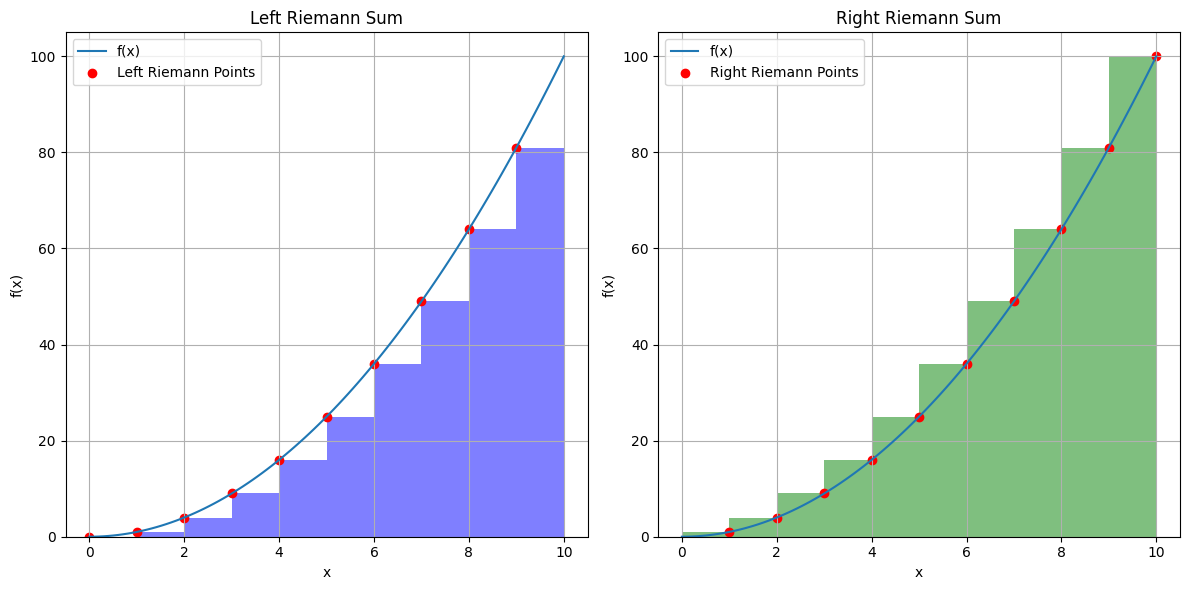

True integral, 1/3 x^3 = 333. Left integral,  285.0 Right integral,  385.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  """The function to integrate."""
  return x**2

def left_reimann(f, a, b, n):
  """Calculates the left Riemann sum."""
  dx = (b - a) / n
  x_values = np.linspace(a, b - dx, n)
  return np.sum(f(x_values) * dx)

def right_reimann(f, a, b, n):
  """Calculates the right Riemann sum."""
  dx = (b - a) / n
  x_values = np.linspace(a + dx, b, n)
  return np.sum(f(x_values) * dx)

# Integration interval
a = 0
b = 10
# Number of subdivisions
n = 10

# Calculate left and right Riemann sums
left_sum = left_reimann(f, a, b, n)
right_sum = right_reimann(f, a, b, n)

# Generate x and y values for the function
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

# Create the left Riemann sum figure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='f(x)')
dx = (b - a) / n
x_rect = np.linspace(a, b - dx, n)
for i in range(n):
  plt.bar(x_rect[i], f(x_rect[i]), width=dx, alpha=0.5, align='edge', color='blue')
plt.title('Left Riemann Sum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x_rect, f(x_rect), color='red', label='Left Riemann Points')
plt.grid(True)  # Turn on the grid
plt.legend()

# Create the right Riemann sum figure
plt.subplot(1, 2, 2)
plt.plot(x_values, y_values, label='f(x)')
x_rect = np.linspace(a + dx, b, n)
for i in range(n):
  plt.bar(x_rect[i]-dx, f(x_rect[i]), width=dx, alpha=0.5, align='edge', color='green')
plt.title('Right Riemann Sum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x_rect, f(x_rect), color='red', label='Right Riemann Points')
plt.grid(True)  # Turn on the grid
plt.legend()

plt.tight_layout()
plt.show()

print("True integral, 1/3 x^3 = 333. Left integral, ", left_sum, "Right integral, ", right_sum)

#### Error

To analyse the error, consider integrating the Taylor expansion of the left integral (the right being trivially similar),

$$
\begin{align}
f(x) &= f(x_i) + f^{\prime}(x_i)(x-x_i) + \cdots \\
\int_{x_i}^{x_{i+1}} f(x) dx &= \int_{x_i}^{x_{i+1}} (f(x_i) + f^{\prime}(x_i)(x-x_i) + \cdots)\ dx \\
&= \int_{x_i}^{x_{i+1}} f(x_i) dx + \int_{x_i}^{x_{i+1}} f^{\prime}(x_i)(x-x_i)dx + \cdots.\
\end{align}$$

since the integral distributes. Integrating term by term we get,

$$ \begin{align}
\int_{x_i}^{x_{i+1}} f(x) dx &= hf(x_i) + \frac{h^2}{2}f^{\prime}(x_i) + O(h^3), \\
&= hf(x_i) + O(h^2)\end{align}
$$

For each subinterval, the left integral is $O(h^2)$.

If we sum the $O(h^2)$ error over the entire Riemann sum, we get $nO(h^2)$. The relationship between $n$ and $h$ is

$$h = \frac{b - a}{n},$$

and so our total error becomes $\frac{b - a}{h}O(h^2) = O(h)$ over the whole interval. Thus the overall accuracy is $O(h)$.


### The Midpoint Reimann integral

Rather than favour the left or right subdomain limit, let's take hte midpoint $y_i = \frac{x_{i+1} + x_i}{2}$. The Midpoint Rule says

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf(y_i).$$




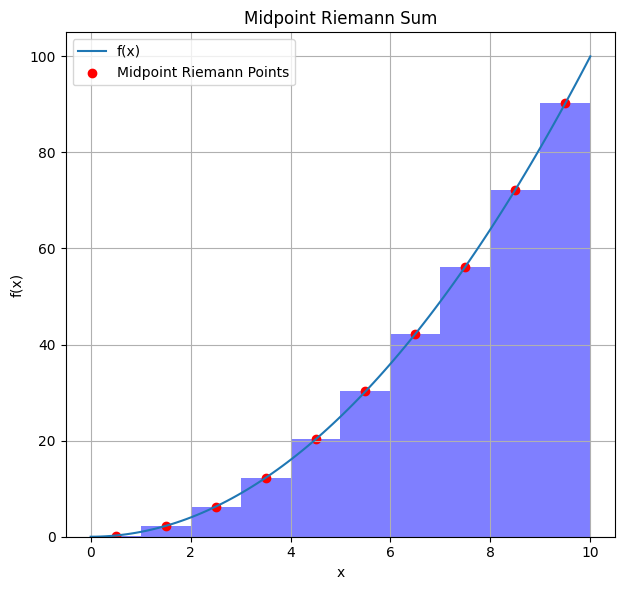

True integral, 1/3 x^3 = 333. Left integral,  285.0 Right integral,  385.0 Midpoint integral,  332.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  """The function to integrate."""
  return x**2

def midpoint_reimann(f, a, b, n):
  """Calculates the midpoint Riemann sum."""
  dx = (b - a) / n
  x_values = np.linspace(a + dx / 2, b - dx / 2, n)
  return np.sum(f(x_values) * dx)


# Integration interval
a = 0
b = 10
# Number of subdivisions
n = 10

# Calculate left, right, and midpoint Riemann sums
midpoint_sum = midpoint_reimann(f, a, b, n)

# Generate x and y values for the function
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

# Create the midpoint Riemann sum figure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='f(x)')
dx = (b - a) / n
x_rect = np.linspace(a + dx / 2, b - dx / 2, n)
for i in range(n):
  plt.bar(x_rect[i], f(x_rect[i]), width=dx, alpha=0.5, align='center', color='blue')
plt.title('Midpoint Riemann Sum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x_rect, f(x_rect), color='red', label='Midpoint Riemann Points')
plt.grid(True)  # Turn on the grid
plt.legend()

plt.tight_layout()
plt.show()

print("True integral, 1/3 x^3 = 333. Left integral, ", left_sum, "Right integral, ", right_sum, "Midpoint integral, ", midpoint_sum)

Another example, approximate $\int_0^\pi \sin(x) = 2$

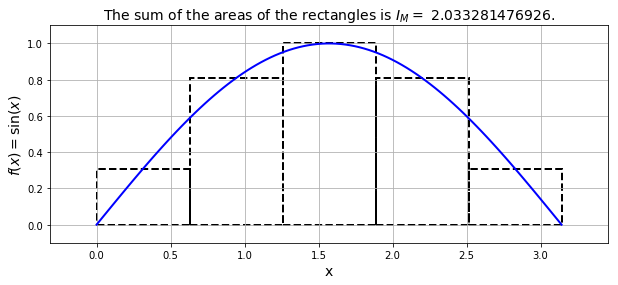

However, if you have discrete data in the range $[a,b]$ you will not be able to stricly calculate the integral since you would overlap on either side...


#### Error


The error can be deduced considering the Taylor series of $f(x)$ around $y_i$, which as before becomes,

$$
\begin{align}
f(x) &= f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots \\
\int_{x_i}^{x_{i+1}} f(x) dx &= \int_{x_i}^{x_{i+1}} \left(f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots\right) dx, \\
&= \int_{x_i}^{x_{i+1}} f(y_i)dx + \int_{x_i}^{x_{i+1}} f^{\prime}(y_i)(x - y_i)dx + \int_{x_i}^{x_{i+1}} \frac{f''(y_i)(x - y_i)^2}{2!}dx + \cdots.
\end{align}
$$

but now there is a trick! Since $x_i$ and $x_{i+1}$ are symmetric about $y_i$, all odd derivatives integrate to zero; e.g. $\int_{x_i}^{x_{i+1}} f^{\prime}(y_i)(x - y_i)dx = 0$

Therefore the midpoint rule becomes:

$$\int_{x_i}^{x_{i+1}} f(x) dx= hf(y_i) + O(h^3)$$

which has $O(h^3)$ accuracy for one subinterval or $O(h^2)$ over the whole interval.